# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants
import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [4]:
import datahandler


dataset_id = "oslo"

data_preprocessor = datahandler.DataPreprocessorOUS()
data_preprocessor.execute()

data_loader = datahandler.DataLoader()
data_loader.execute()


Loading dataset:   0%|          | 0/6 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 6/6 [00:22<00:00,  3.77s/it]


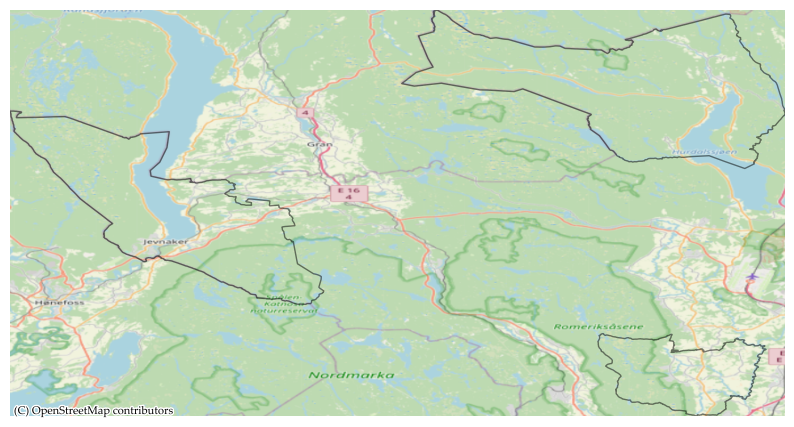

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import folium

def load_and_combine_geojsons(file_paths):
    # Load GeoJSON files into GeoDataFrames
    gdfs = [gpd.read_file(path) for path in file_paths]
    # Combine all GeoDataFrames into one
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
    return combined_gdf

def save_geojson(gdf, output_path):
    # Save the combined GeoDataFrame to a new GeoJSON file
    gdf.to_file(output_path, driver='GeoJSON')
    
def plot_geojson_with_folium(gdf):
    # Convert GeoDataFrame to GeoJSON format
    geojson_data = gdf.to_json()
    
    # Create a map centered around the data
    map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
    m = folium.Map(location=map_center, zoom_start=9)

    # Add GeoJSON overlay
    folium.GeoJson(
        geojson_data,
        name='geojson'
    ).add_to(m)

    # Add a layer control panel to the map
    folium.LayerControl().add_to(m)

    # Display the map
    return m


# Paths to your GeoJSON files
base_path = os.path.join('..', '..', 'data', 'nonurban_municipalities')

# Full paths to the GeoJSON files
file_paths = [
    os.path.join(base_path, 'a.geojson'),
    os.path.join(base_path, 'b.geojson'),
    os.path.join(base_path, 'c.geojson')
]
combined_gdf = load_and_combine_geojsons(file_paths)

# Plot the combined GeoJSON
plot_geojson(combined_gdf)